$\textbf{Selection of Depth and Areal Regions}$

$\text{In this tutorial we will see how to select the best region in the dataset using the PyCCAPT calibration module.}$

In [1]:
# Activate intractive functionality of matplotlib
%matplotlib notebook
# import libraries
import os
import os.path as path
import matplotlib.pyplot as plt

# Local module and scripts
from pyccapt.calibration.calibration_tools import variables, data_loadcrop, tools
from pyccapt.calibration.calibration_tools import widgets as wd

In [2]:
# if recieve error for pytables library you should uncomment the line below and run the cell
import sys
# !conda install --yes --prefix {sys.prefix} pytables

In [3]:
# dataset name
# AL_data_b
# OLO_AL_6_data
# OLO_W_6_data
# OLO_Ni_8_data
# X6Cr17_2V30Min_5_data
# data_1029_Jun-27-2022_15-53_Pd
# data_115_Jul-27-2022_17-44_Powersweep3
# SS-420-1_data
# data_1029_Jun-27-2022_15-53_Pd

In [4]:
tdc, dataset, flightPathLength_d, t0_d = wd.dataset_tdc_selection()
display(tdc, dataset, flightPathLength_d, t0_d)

Dropdown(description='TDC model:', options=('surface_concept', 'roentdec'), value='surface_concept')

Text(value='OLO_AL_6_data', description='Dataset:', placeholder='Paste ticket description here!')

Text(value='110', description='Flight path length:', placeholder='Flight path length')

Text(value='51.74', description='t0:', placeholder='T_0 of the instrument')

$\text{Path to the dataset}$

In [14]:
tdc_model = tdc.value

dataset_name = dataset.value

flightPathLength = float(flightPathLength_d.value) # mm 
# The initial value for t_0
t0 = float(t0_d.value) # ns

p = path.abspath(path.join("", "../../../.."))

variables.init()
variables.path = os.path.join(p, 'tests//data')
variables.result_path = os.path.join(p, 'tests/results/load_crop/' + dataset_name)
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
# dataset name
filename = variables.path + '//' + dataset_name + '.h5'
savename = variables.result_path + '//' + dataset_name + '_cropped' + '.h5'

# Create data farame out of hdf5 file dataset
dldGroupStorage = data_loadcrop.fetch_dataset_from_dld_grp(filename, tdc=tdc_model)
dld_masterDataframe = data_loadcrop.concatenate_dataframes_of_dld_grp(dldGroupStorage)
print('Total number of Ions:', len(dldGroupStorage[0]))

Filename>> D:\pyccapt\tests//data//data_1029_Jun-27-2022_15-53_Pd.h5
{'apt': ['high_voltage', 'main_chamber_vacuum', 'num_events', 'pulse_voltage', 'temperature', 'time_counter'], 'dld': ['high_voltage', 'pulse_voltage', 'start_counter', 't', 'x', 'y'], 'time': ['time_h', 'time_m', 'time_s']}
Total number of Ions: 558335


$\textbf {Crop and select the stable projection(right side) of below plotted graph}$
<br>
<br>
$\text{In the Experiment history plot below you should select the ions. After selectiong the ions with a rectangle you can continue and run the next cell. }$

<IPython.core.display.Javascript object>


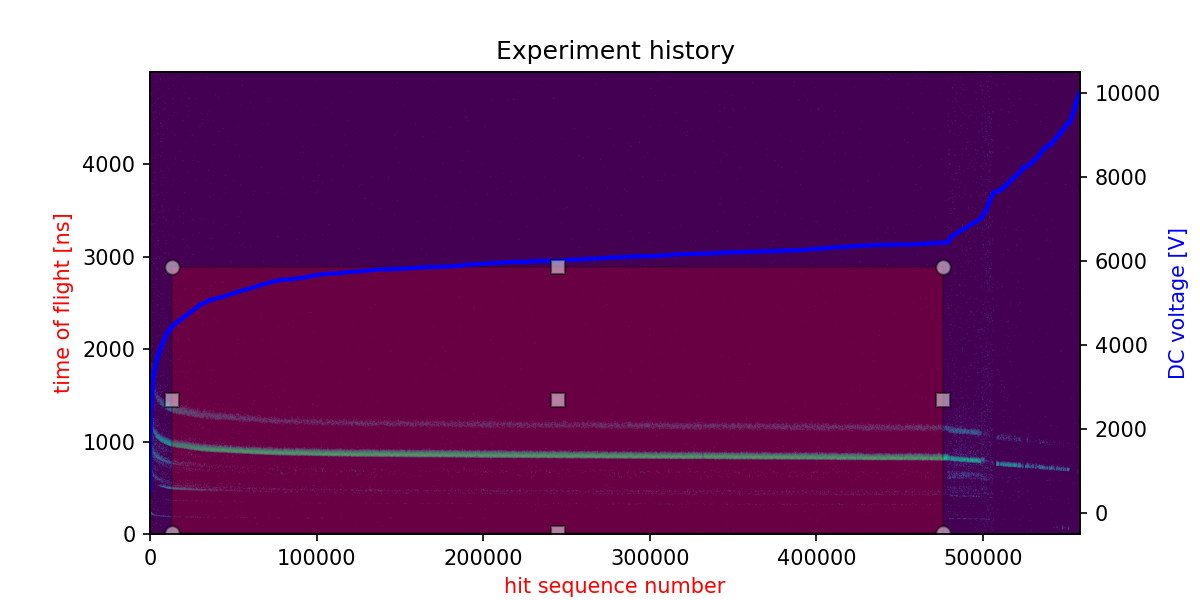

In [15]:
fig1, ax1 = plt.subplots(figsize=(8, 4))
data_loadcrop.plot_graph_for_dld_high_voltage(ax1, dldGroupStorage, save_name = variables.result_path + '//ex_hist_' + dataset_name)



$\text{Boundaries of the selected(cropped) part of the graph is printed below}$

In [16]:
# Crop the dataset
print('Min Idx:', variables.selected_x1, 'Max Idx:', variables.selected_x2)
data_crop = data_loadcrop.crop_dataset(dld_masterDataframe)

Min Idx: 13320.431770964584 Max Idx: 476197.32854515815


<IPython.core.display.Javascript object>


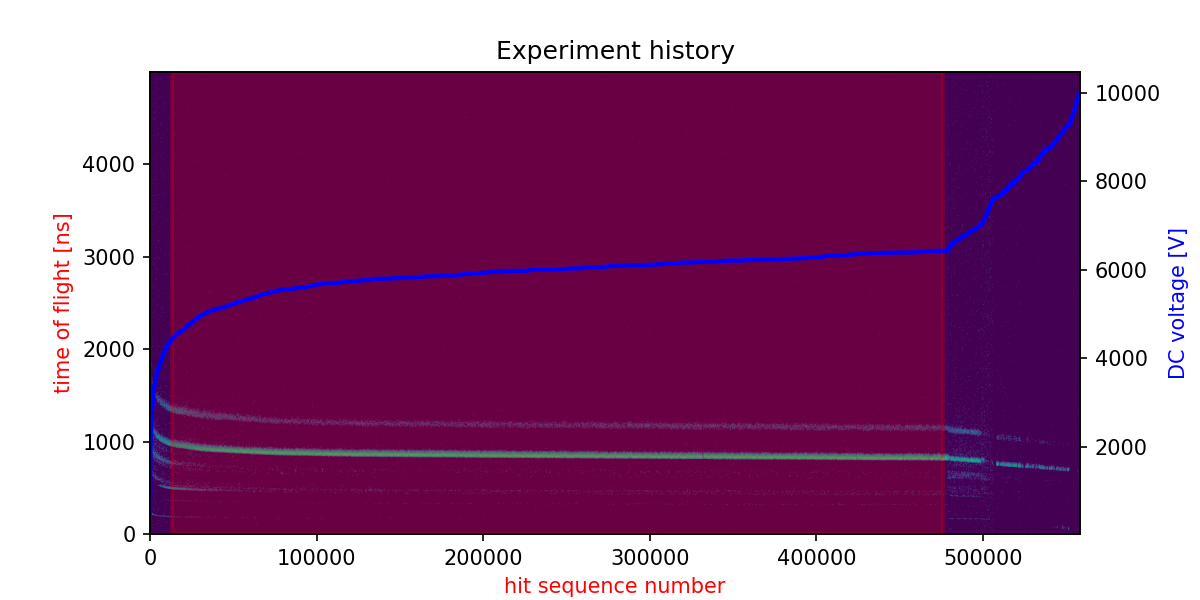

In [17]:
# Plot and selected experiment history
fig1, ax1 = plt.subplots(figsize=(8, 4))
data_loadcrop.plot_graph_for_dld_high_voltage(ax1, dldGroupStorage, rect=True, save_name=variables.result_path + '//ex_hist_slected_' + dataset_name)

$\textbf {ROI selcetion}$
<br>
<br>
$\text {Select the region of maximum concentration of electrons in the below plotted graph to utlize relevant data}$

<IPython.core.display.Javascript object>


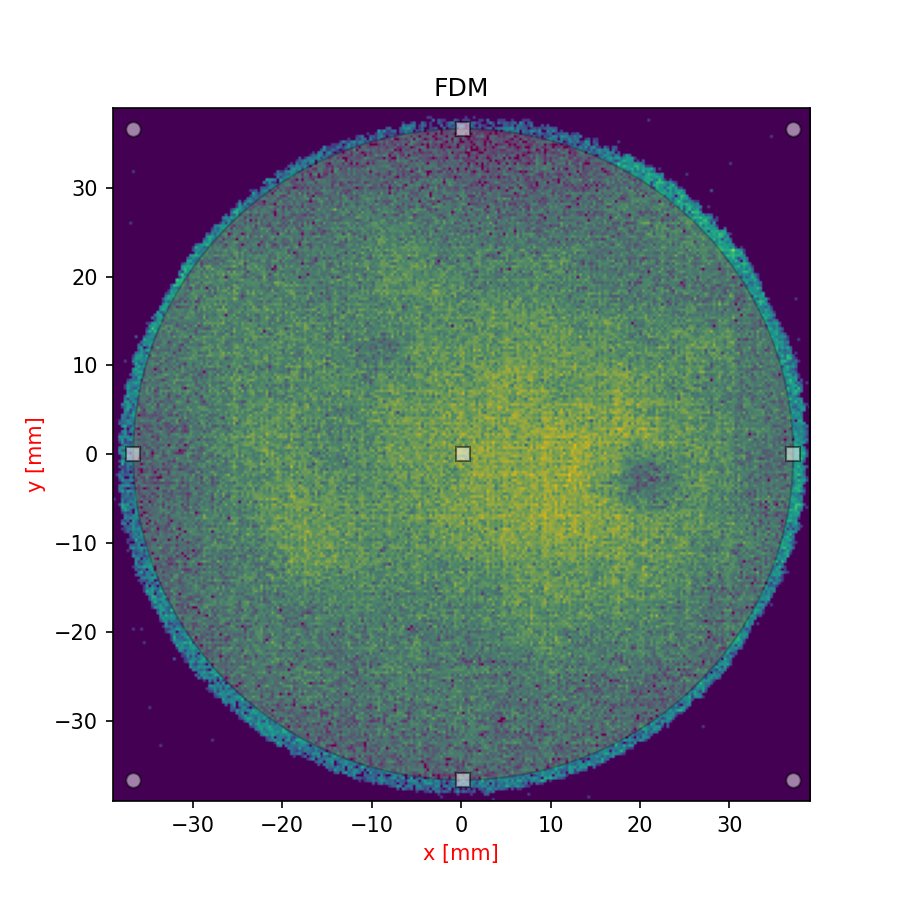

09-28-2022 14:04:11 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_data_1029_Jun-27-2022_15-53_Pd
09-28-2022 14:04:11 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_data_1029_Jun-27-2022_15-53_Pd
09-28-2022 14:04:11 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_data_1029_Jun-27-2022_15-53_Pd


In [18]:
# Plot and select the FDM
fig1, ax1 = plt.subplots(figsize=(6,6))
data_loadcrop.plot_crop_FDM(ax1, fig1, data_crop,  bins=(256,256), save_name = variables.result_path + '//FDM_' + dataset_name)

$\text {The region selected in the previous step is displayed below.}$

<IPython.core.display.Javascript object>


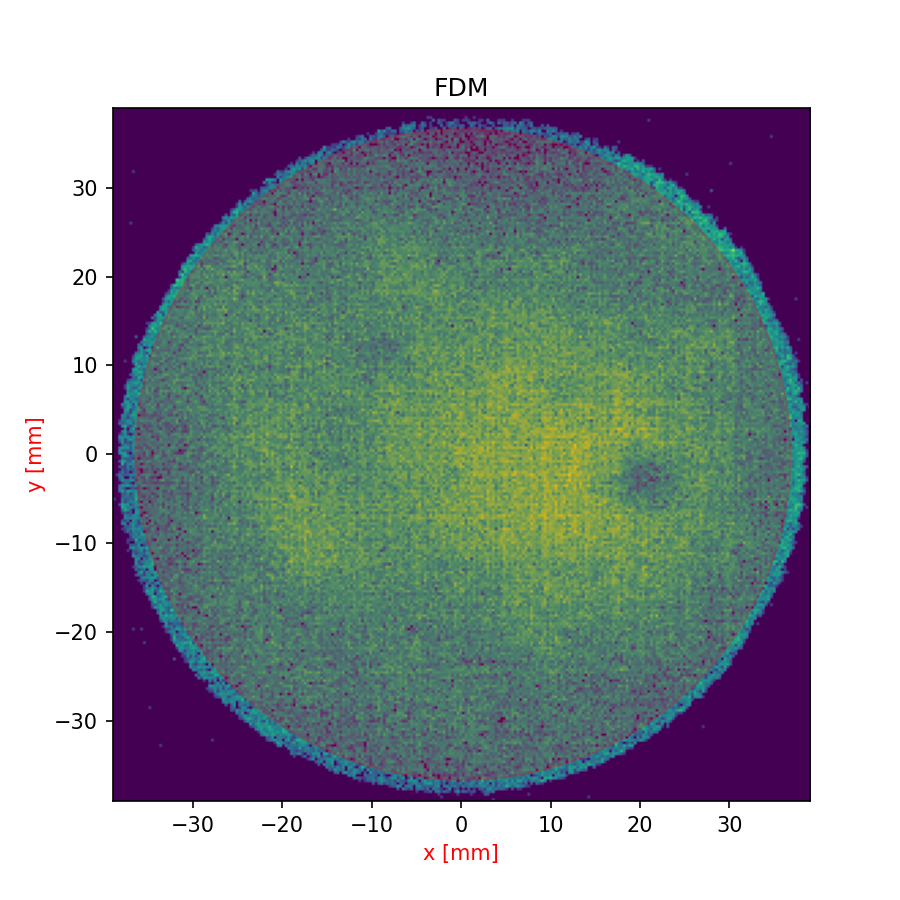

09-28-2022 14:04:38 | INFO | Circle selector Called
09-28-2022 14:04:38 | INFO | Circle selector Called
09-28-2022 14:04:38 | INFO | Circle selector Called
x: 0.23248977598851184 y: -0.007126949663167181 roi: 36.62141001855288
09-28-2022 14:04:38 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_c_data_1029_Jun-27-2022_15-53_Pd
09-28-2022 14:04:38 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_c_data_1029_Jun-27-2022_15-53_Pd
09-28-2022 14:04:38 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_c_data_1029_Jun-27-2022_15-53_Pd


In [19]:
# plot selected area in FDM
fig1, ax1 = plt.subplots(figsize=(6,6))
data_loadcrop.plot_FDM_after_selection(ax1, fig1, data_crop, bins=(256,256), save_name = variables.result_path + '//FDM_c_' + dataset_name)

$\text {The final selected data after processing is shown below.}$

<IPython.core.display.Javascript object>


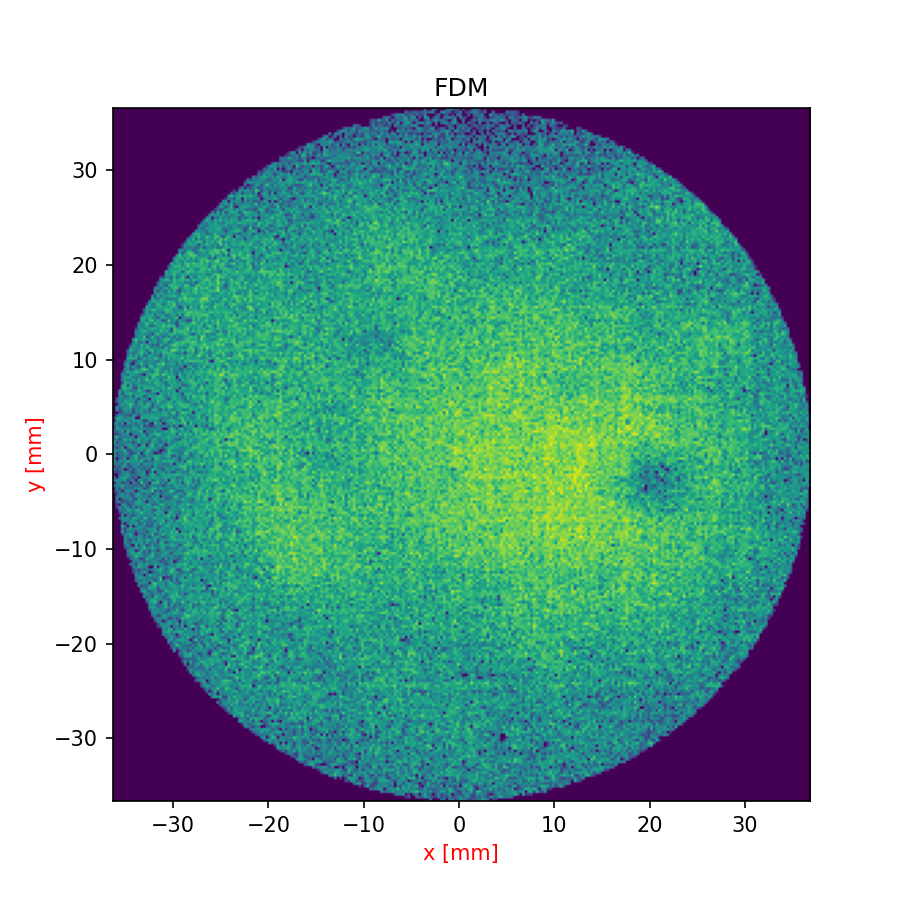

09-28-2022 14:04:41 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_crop_data_1029_Jun-27-2022_15-53_Pd
09-28-2022 14:04:41 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_crop_data_1029_Jun-27-2022_15-53_Pd
09-28-2022 14:04:41 | INFO | Plot saved by the name D:\pyccapt\tests/results/load_crop/data_1029_Jun-27-2022_15-53_Pd//FDM_crop_data_1029_Jun-27-2022_15-53_Pd


In [20]:
# Crop and plot the dataset
fig1, ax1 = plt.subplots(figsize=(6,6))
data_crop_FDM = data_loadcrop.crop_data_after_selection(data_crop)
data_loadcrop.plot_FDM(ax1, fig1, data_crop_FDM, bins=(256,256), save_name = variables.result_path + '//FDM_crop_' + dataset_name)

$\text {The final dataset is saved and the percentage of loss in TOF croption is prited.}$

In [21]:
# save the dataset to hdf5 file
name = os.path.splitext(filename)[0]
data_loadcrop.save_croppped_data_to_hdf5(data_crop_FDM, dld_masterDataframe, savename, tdc_model)

09-28-2022 14:04:44 | INFO | tofCropLossPct 21
09-28-2022 14:04:44 | INFO | tofCropLossPct 21
09-28-2022 14:04:44 | INFO | tofCropLossPct 21


In [22]:
# add the dataset to hdf5 file
data_loadcrop.add_croppped_data_to_hdf5(filename, data_crop_FDM, dld_masterDataframe, tdc_model)

tofCropLossPct 21.157011471607547
